In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import f1_score

In [2]:
df = pd.read_csv('/content/drive/MyDrive/MECHINE LEARNING/ML Algorithm/Random Forest Algorithm/Position_Salaries.csv')

In [3]:
df.describe()


,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [5]:
df.isnull().sum()

,0
Position,0
Level,0
Salary,0


In [6]:
df.shape

(10, 3)

In [7]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [9]:
df['Position'].unique()

array(['Business Analyst', 'Junior Consultant', 'Senior Consultant',
       'Manager', 'Country Manager', 'Region Manager', 'Partner',
       'Senior Partner', 'C-level', 'CEO'], dtype=object)

In [13]:
#x = df.iloc[:,1:2].values

In [12]:
#y = df.iloc[:,2].values

In [14]:
df.drop('Position',axis = 1 ,inplace=True)

In [15]:
df.head()

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000


<Axes: xlabel='Salary', ylabel='Level'>

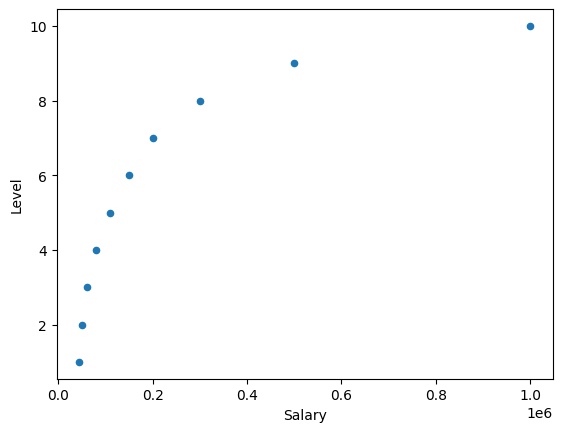

In [16]:
df.plot(kind = 'scatter', x = 'Salary', y = 'Level')

In [104]:
x = df.iloc[:,0].values
y = df.iloc[:,1].values

In [105]:
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [109]:
x = x.reshape(-1,1)
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [112]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [107]:
#scale = MinMaxScaler()
#y = scale.fit_transform(y.reshape(-1,1))

In [94]:
y

array([[0.        ],
       [0.0052356 ],
       [0.01570681],
       [0.03664921],
       [0.06806283],
       [0.10994764],
       [0.16230366],
       [0.26701571],
       [0.47643979],
       [1.        ]])

In [110]:
regressor = RandomForestRegressor(n_estimators= 10,random_state=0)
regressor.fit(x,y)

RandomForestRegressor(n_estimators=10, random_state=0)

In [114]:
y_pred = regressor.predict([[7]])
y_pred

array([210000.])

<ipython-input-116-ae7bed5eb1c9>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_grid = np.arange(min(x),max(x),0.01)


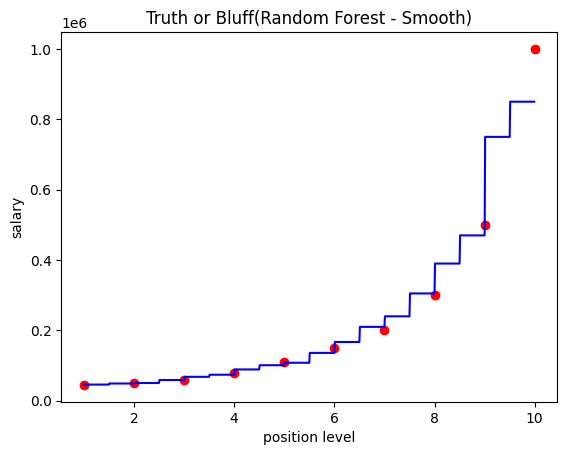

In [116]:
x_grid = np.arange(min(x),max(x),0.01)
x_grid = x_grid.reshape(len(x_grid),1)

plt.scatter(x,y,color = 'red') #ploting real points
plt.plot(x_grid ,regressor.predict(x_grid),color = 'blue') #ploting for predict points

plt.title('Truth or Bluff(Random Forest - Smooth)')
plt.xlabel('position level')
plt.ylabel('salary')
plt.show()

In [132]:
regressor2 = RandomForestRegressor(n_estimators= 100,random_state=0)
regressor2.fit(x,y)

RandomForestRegressor(random_state=0)

In [133]:
y_pred2 = regressor2.predict([[9]])
y_pred2

array([495000.])

<ipython-input-138-637e16464e1c>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_grid = np.arange(min(x),max(x),0.01)


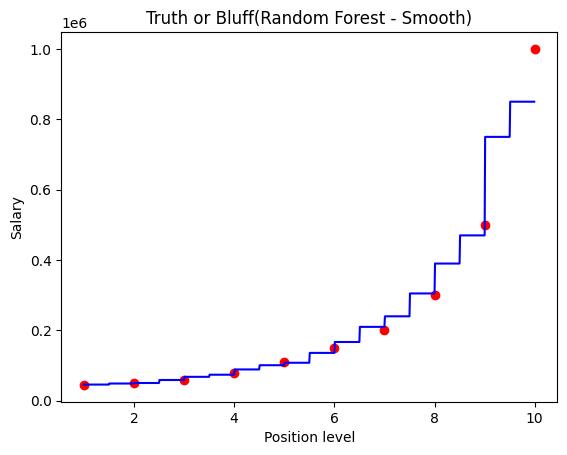

In [138]:
#higher resolution graph
x_grid = np.arange(min(x),max(x),0.01)
x_grid = x_grid.reshape(len(x_grid),1)
plt.scatter(x,y, color='red')

plt.plot(x_grid, regressor.predict(x_grid),color='blue')
plt.title("Truth or Bluff(Random Forest - Smooth)")
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()